In [1]:
import pandas as pd
import os
from unicodedata import normalize
import re
import math as m
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import geopandas as gpd

# Init

In [2]:
path01 = 'your_path'
path02 = 'your_path'
path03 = 'your_path'
path04 = 'your_path'
path_plot = path04+'generated/'

# Dicts and Data

In [3]:
dict_codigos = {
    1:'I',
    2:'II',
    3:'III',
    4:'IV',
    5:'V',
    6:'VI',
    7:'VII',
    8:'VIII',
    9:'IX',
    10:'X',
    11:'XI',
    12:'XII',
    13:'XIII',
    14:'XIV',
    15:'XV',
    16:'XVI',
}


dfs2_all = pd.read_csv(path03+'generated/results_s2.csv')
dfs3_all = pd.read_csv(path03+'generated/results_s3.csv')

dfs2_all['cod_reg_rom'] = dfs2_all.cod_reg.map(dict_codigos)
dfs3_all['cod_reg_rom'] = dfs3_all.cod_reg.map(dict_codigos)

dfs2_all['risk_rating_s2'] = 100*dfs2_all.expected_imported_cases_scenario_2_mid/dfs2_all.new_cases_adjusted_mean_mid
dfs2_all['risk_rating_s2sim'] = 100*dfs2_all.expected_imported_cases_scenario_2sim_mid/dfs2_all.new_cases_adjusted_mean_mid
dfs3_all['risk_rating_s3'] = 100*dfs3_all.expected_imported_cases_scenario_3_mid/dfs3_all.new_cases_adjusted_mean_mid
dfs3_all['risk_rating_s3sim'] = 100*dfs3_all.expected_imported_cases_scenario_3sim_mid/dfs3_all.new_cases_adjusted_mean_mid


dfs2_all['Macrozona'] = np.where((dfs2_all.region=='arica y parinacota') | (dfs2_all.region=='tarapaca') | (dfs2_all.region=='antofagasta') | (dfs2_all.region=='atacama'),'NORTE',
                                 np.where((dfs2_all.region=='coquimbo') | (dfs2_all.region=='valparaiso') | (dfs2_all.region=='metropolitana'),'CENTRO',
                                 np.where((dfs2_all.region=='ohiggins') | (dfs2_all.region=='maule') | (dfs2_all.region=='nuble') | (dfs2_all.region=='biobio'),'CENTRO SUR',
                                 np.where((dfs2_all.region=='araucania') | (dfs2_all.region=='los rios') | (dfs2_all.region=='los lagos'),'SUR',
                                 np.where((dfs2_all.region=='aysen') | (dfs2_all.region=='magallanes'),'AUSTRAL','UNKNOWN')))))

dfs3_all['Macrozona'] = np.where((dfs3_all.region=='arica y parinacota') | (dfs3_all.region=='tarapaca') | (dfs3_all.region=='antofagasta') | (dfs3_all.region=='atacama'),'NORTE',
                                 np.where((dfs3_all.region=='coquimbo') | (dfs3_all.region=='valparaiso') | (dfs3_all.region=='metropolitana'),'CENTRO',
                                 np.where((dfs3_all.region=='ohiggins') | (dfs3_all.region=='maule') | (dfs3_all.region=='nuble') | (dfs3_all.region=='biobio'),'CENTRO SUR',
                                 np.where((dfs3_all.region=='araucania') | (dfs3_all.region=='los rios') | (dfs3_all.region=='los lagos'),'SUR',
                                 np.where((dfs3_all.region=='aysen') | (dfs3_all.region=='magallanes'),'AUSTRAL','UNKNOWN')))))


dfs2p = dfs2_all[dfs2_all.new_cases_adjusted_mean_mid.isna()==False].copy()
dfs3p = dfs3_all[dfs3_all.new_cases_adjusted_mean_mid.isna()==False].copy()

dfs2 = dfs2_all[['cod_reg','cod_reg_rom','region','expected_imported_cases_scenario_2','risk_rating_scenario_2','local_cases_scenario_2','rt_estimate_scenario_2',
         'risk_rating_scenario_2sim','expected_imported_cases_scenario_2sim']].copy()
dfs3 = dfs3_all[['cod_reg','cod_reg_rom','region','expected_imported_cases_scenario_3','risk_rating_scenario_3','local_cases_scenario_3','rt_estimate_scenario_3',
         'risk_rating_scenario_3sim','expected_imported_cases_scenario_3sim']].copy()

In [5]:
gdfr  = gpd.GeoDataFrame(gpd.read_file(path04+'Regional.shp'), geometry='geometry')
gdfr

,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,Region,geometry
0,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,Región de Arica y Parinacota,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,1085,2,1,42284.567484,4.830637e+10,1.213713e+06,Región de Tarapacá,"MULTIPOLYGON (((-7810213.515 -2298008.280, -78..."
2,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,Región de Antofagasta,"MULTIPOLYGON (((-7870470.961 -2985679.186, -78..."
3,1087,15,12,133053.142345,3.581316e+11,9.049830e+07,Región de Magallanes y Antártica Chilena,"MULTIPOLYGON (((-7494057.535 -7542535.383, -74..."
4,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,Región de Aysén del Gral.Ibañez del Campo,"MULTIPOLYGON (((-8413517.696 -6234055.255, -84..."
5,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,Región de Atacama,"MULTIPOLYGON (((-7932747.769 -3311218.615, -79..."
6,1090,5,4,40575.901682,5.498082e+10,2.065933e+06,Región de Coquimbo,"MULTIPOLYGON (((-7963268.900 -3784870.143, -79..."
7,1091,6,5,16322.970393,2.301475e+10,1.679609e+06,Región de Valparaíso,"MULTIPOLYGON (((-8991645.917 -3991821.789, -89..."
8,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,Región Metropolitana de Santiago,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
9,1093,13,10,48408.371357,8.771834e+10,7.874158e+06,Región de Los Lagos,"MULTIPOLYGON (((-8331768.181 -5403721.402, -83..."


In [ ]:
dfr = gdfr.merge(dfs2_all[['cod_reg','risk_rating_s2','risk_rating_s2sim']],how='left',left_on='codregion',right_on='cod_reg')\
          .merge(dfs3_all[['cod_reg','risk_rating_s3','risk_rating_s3sim']],how='left',left_on='codregion',right_on='cod_reg')


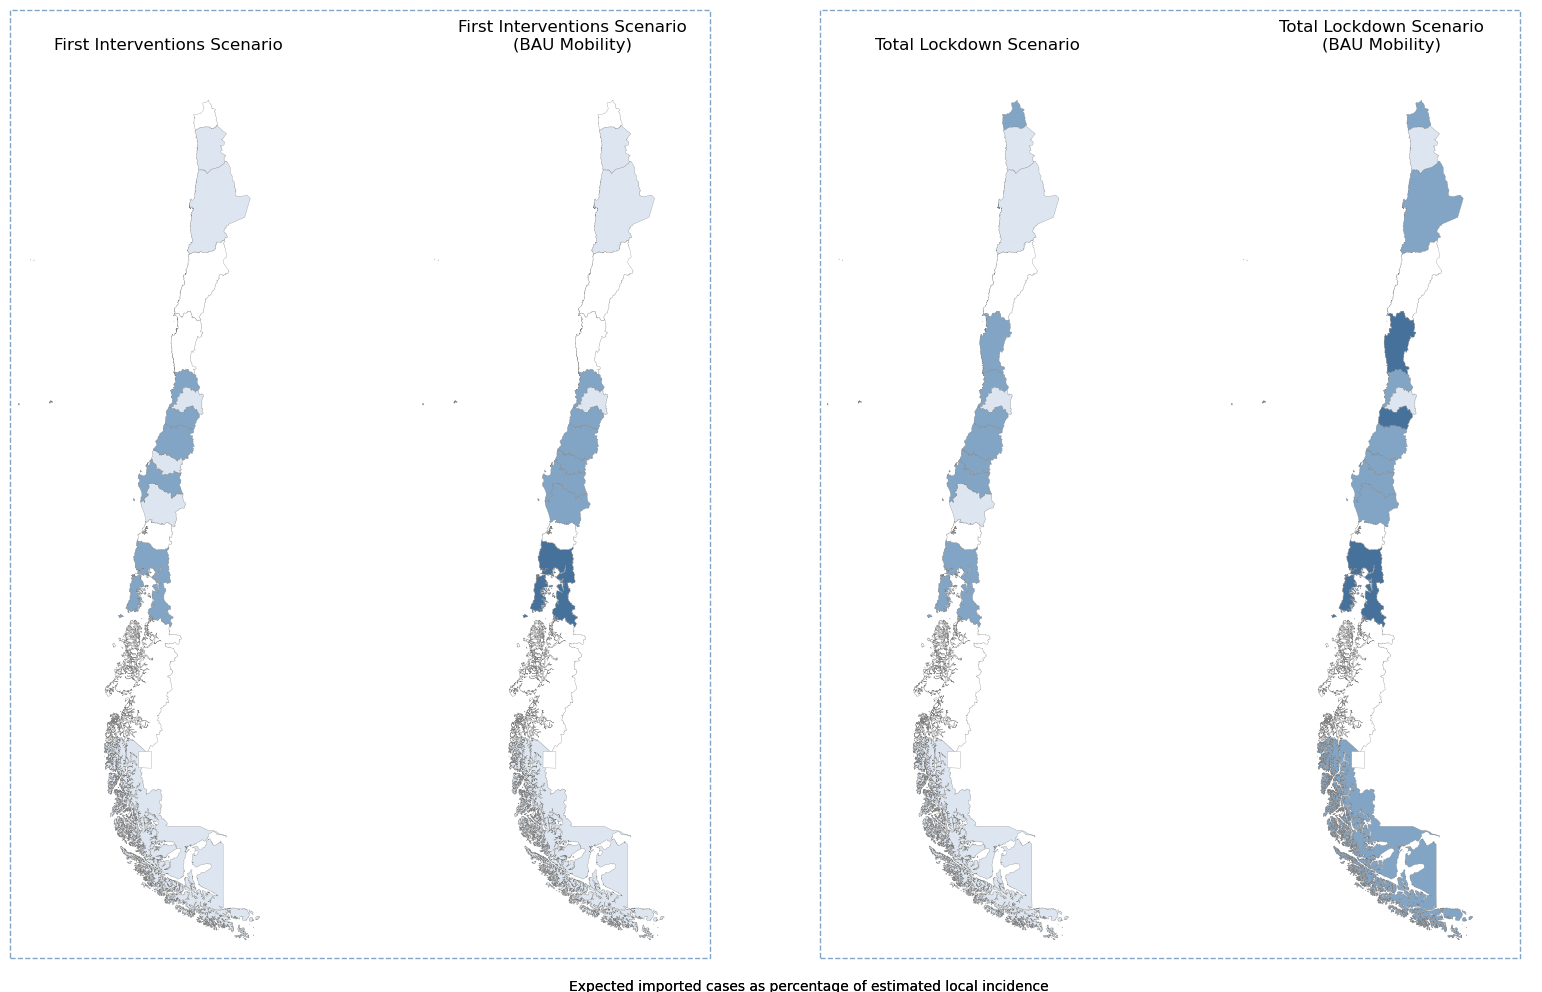

In [11]:
fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(20,12))
axes = axes.flatten()

ax=axes[0]
ax = dfr.plot(ax=ax,color=dfr.risk_rating_color_s2,edgecolor='grey',linewidth=0.2,
              missing_kwds={"color": "white","edgecolor": "red",'alpha':0.3,'linewidth':0.1,"hatch": "///","label": "Missing values"},legend=False,figsize=(12,12)) #No esta sirviendo el relleno con color manual
ax.set_xlim([-0.9e7,-0.7e7])
ax.axis('off')
ax.set_title('First Interventions Scenario')

ax=axes[1]
ax = dfr.plot(ax=ax,color=dfr.risk_rating_color_s2sim,edgecolor='grey',linewidth=0.2,
              missing_kwds={"color": "white","edgecolor": "red",'alpha':0.3,'linewidth':0.1,"hatch": "///","label": "Missing values"},legend=False,figsize=(12,12)) #No esta sirviendo el relleno con color manual
ax.set_xlim([-0.9e7,-0.7e7])
ax.axis('off')
ax.set_title('First Interventions Scenario\n(BAU Mobility)')

ax=axes[2]
ax = dfr.plot(ax=ax,color=dfr.risk_rating_color_s3,edgecolor='grey',linewidth=0.2,
              missing_kwds={"color": "white","edgecolor": "red",'alpha':0.3,'linewidth':0.1,"hatch": "///","label": "Missing values"},legend=False,figsize=(12,12)) #No esta sirviendo el relleno con color manual
ax.set_xlim([-0.9e7,-0.7e7])
ax.axis('off')
ax.set_title('Total Lockdown Scenario')

ax=axes[3]
ax = dfr.plot(ax=ax,color=dfr.risk_rating_color_s3sim,edgecolor='grey',linewidth=0.2,
              missing_kwds={"color": "white","edgecolor": "red",'alpha':0.3,'linewidth':0.1,"hatch": "///","label": "Missing values"},legend=False,figsize=(12,12)) #No esta sirviendo el relleno con color manual
ax.set_xlim([-0.9e7,-0.7e7])
ax.axis('off')
ax.set_title('Total Lockdown Scenario\n(BAU Mobility)')

a1 = plt.scatter([],[], s=200, marker='s', facecolors='#DDE6F0', edgecolors='k')#EADDF0
a2 = plt.scatter([],[], s=200, marker='s', facecolors='#82A5C6', edgecolors='k')#B182C6
a3 = plt.scatter([],[], s=200, marker='s', facecolors='#45719B', edgecolors='k')#6F459B
a4 = plt.scatter([],[], s=200, marker='s', facecolors='white', edgecolors='k')#
legend2 = ax.legend((a1,a2,a3,a4),('Below 1%', 'Between 1% and 10%', 'Greater than 10%','No data'),labelspacing=1,scatterpoints=1, bbox_to_anchor=[-1.4, -0.07], 
          loc='lower center',title='Expected imported cases as percentage of estimated local incidence',ncol=4,fontsize=13,handletextpad=0.1,frameon=False)
ax.add_artist(legend2)
fig.patches.extend([plt.Rectangle((0.13,0.13),0.35,0.79,joinstyle='round',linestyle='--', linewidth=1,
                                  facecolor='none', edgecolor='#82A5C6', zorder=1000,
                                  transform=fig.transFigure, figure=fig)])

fig.patches.extend([plt.Rectangle((0.535,0.13),0.35,0.79,joinstyle='round',linestyle='--', linewidth=1,
                                  facecolor='none', edgecolor='#82A5C6', zorder=1000,
                                  transform=fig.transFigure, figure=fig)])


In [36]:
#fig.savefig(path_plot+'maps_riskrating.pdf',facecolor='white')